### **Data Prepocessing**

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [14]:
df = pd.read_csv('Bank_Loan_Granting.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


### **Exploratory Data**

In [16]:
df.describe(include='all')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,0/30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,NaN,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,NaN,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,NaN,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,NaN,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000


In [17]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

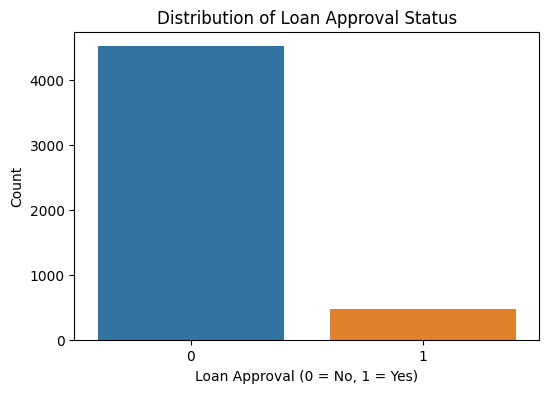

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Personal Loan', data=df)
plt.title('Distribution of Loan Approval Status')
plt.xlabel('Loan Approval (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

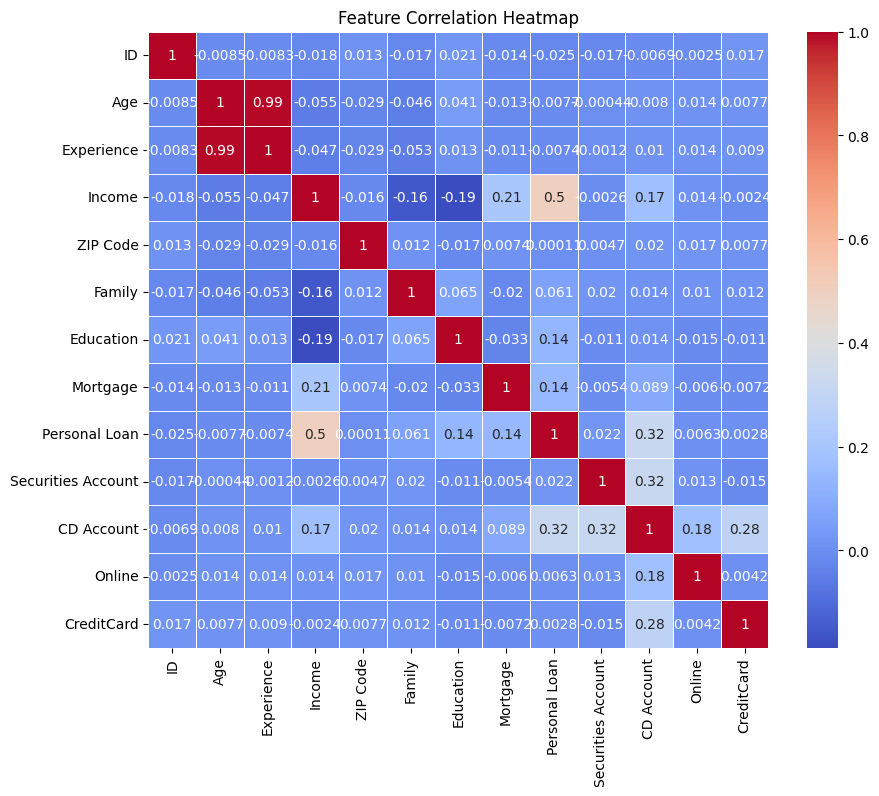

In [19]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

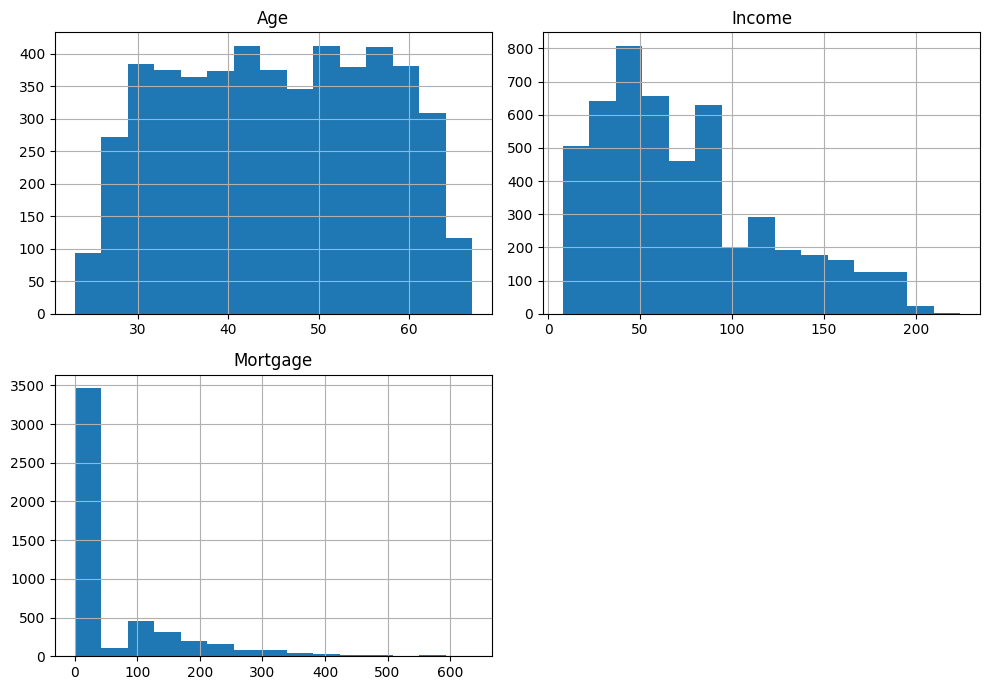

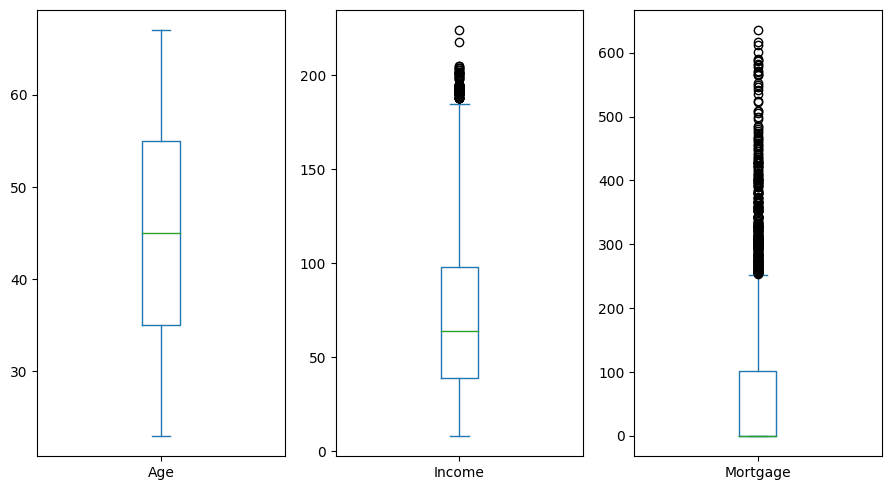

In [20]:
# Histogram dan Boxplot untuk variabel numerik
numerical_vars = ['Age', 'Income', 'CCAvg', 'Mortgage']
df[numerical_vars].hist(bins=15, figsize=(10, 7))
plt.tight_layout()
plt.show()

df[numerical_vars].plot(kind='box', subplots=True, layout=(1,4), figsize=(12, 5))
plt.tight_layout()
plt.show()


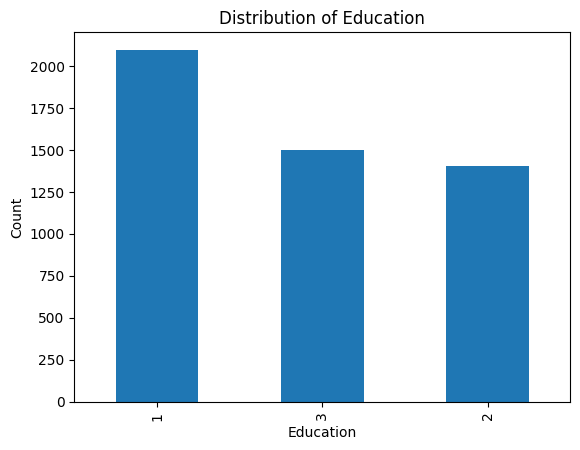

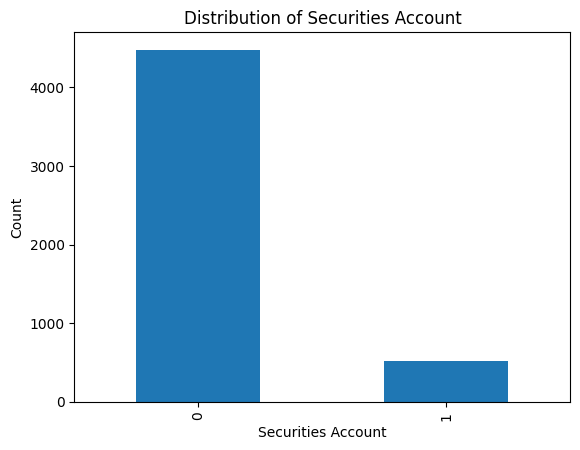

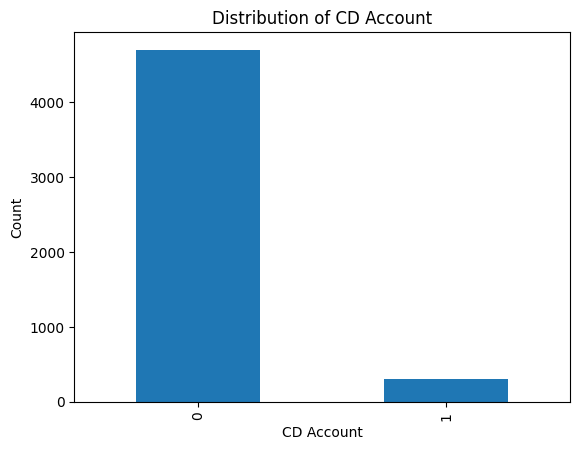

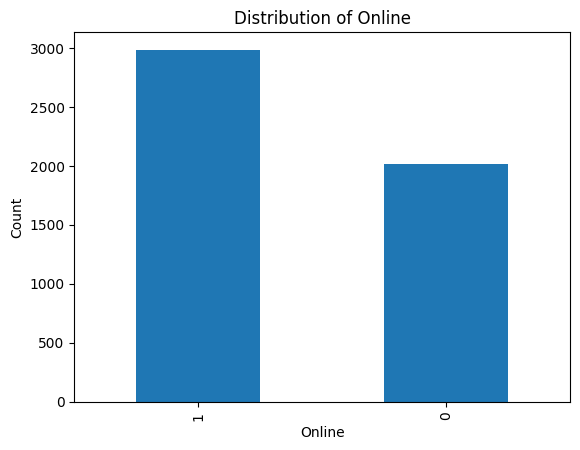

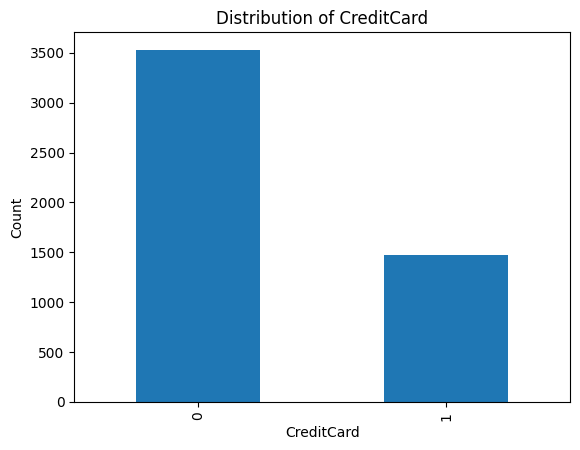

In [21]:
# Barplot untuk variabel categorical
categorical_vars = ['Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for var in categorical_vars:
    df[var].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {var}')
    plt.ylabel('Count')
    plt.xlabel(var)
    plt.show()

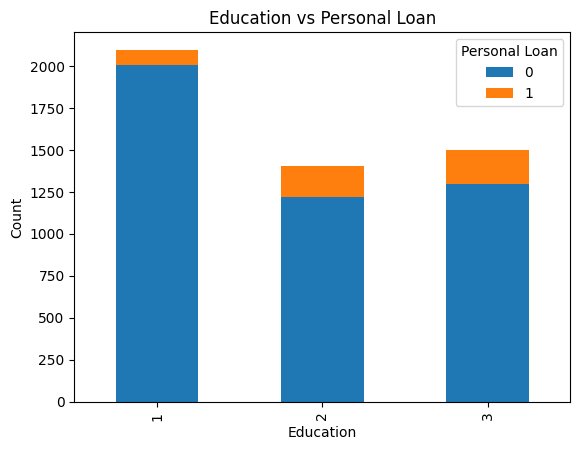

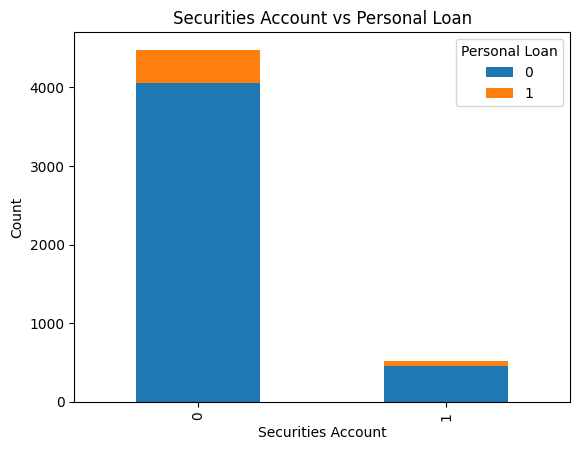

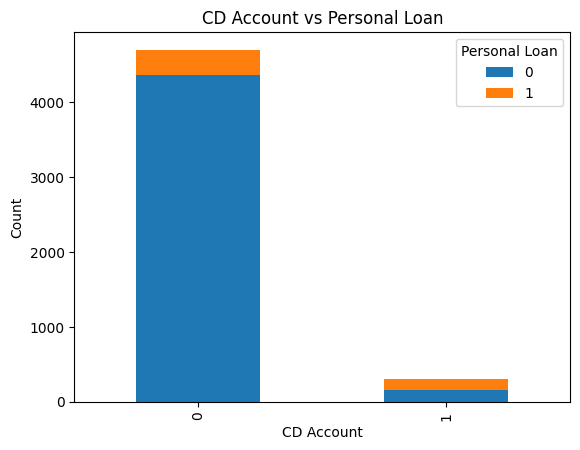

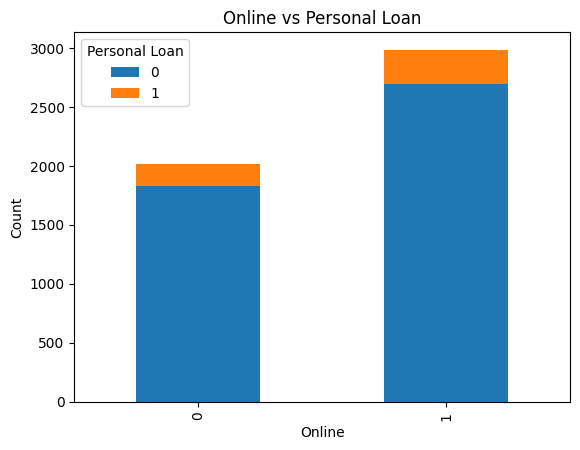

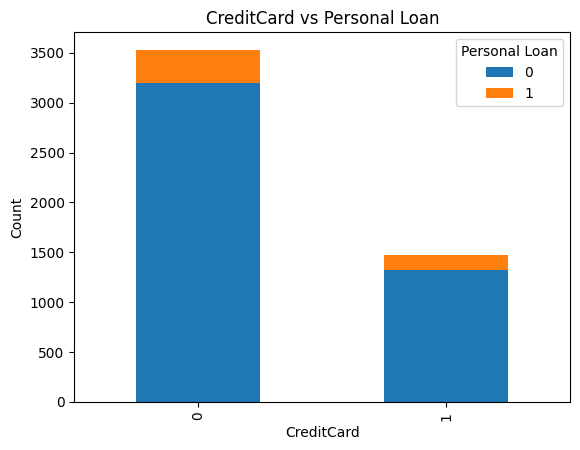

In [22]:
# Hubungan independent var. dengan variabel target
target_var = 'Personal Loan'
for var in categorical_vars:
    pd.crosstab(df[var], df[target_var]).plot(kind='bar', stacked=True)
    plt.title(f'{var} vs {target_var}')
    plt.ylabel('Count')
    plt.show()

Data Type Convertion

In [23]:
def convert_fraction(x):
    try:
        numerator, denominator = map(float, x.split('/'))
        if denominator == 0:
            return 0.0
        else:
            return numerator / denominator
    except ValueError:
        return 0.0

df['CCAvg'] = df['CCAvg'].apply(convert_fraction)

In [24]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
baseline_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
baseline_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

In [27]:
y_pred_baseline = (baseline_model.predict(X_test) > 0.5).astype("int32")
baseline_metrics = {
    "Model": "Baseline Neural Network",
    "Accuracy": accuracy_score(y_test, y_pred_baseline),
    "Precision": precision_score(y_test, y_pred_baseline),
    "Recall": recall_score(y_test, y_pred_baseline),
    "F1 Score": f1_score(y_test, y_pred_baseline)
}

32/32 [==============================] - 0s 663us/step


In [28]:
optimized_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

optimized_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
optimized_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

In [29]:
y_pred_optimized = (optimized_model.predict(X_test) > 0.5).astype("int32")
optimized_metrics = {
    "Model": "Optimized Neural Network",
    "Accuracy": accuracy_score(y_test, y_pred_optimized),
    "Precision": precision_score(y_test, y_pred_optimized),
    "Recall": recall_score(y_test, y_pred_optimized),
    "F1 Score": f1_score(y_test, y_pred_optimized)
}

32/32 [==============================] - 0s 925us/step


In [30]:
performance_df = pd.DataFrame([baseline_metrics, optimized_metrics])
print("Model Performance Summary")
print(performance_df)

Model Performance Summary
                      Model  Accuracy  Precision    Recall  F1 Score
0   Baseline Neural Network     0.977   0.918367  0.857143  0.886700
1  Optimized Neural Network     0.979   0.956522  0.838095  0.893401


In [31]:
performance_df.style.format({"Accuracy": "{:.2f}", "Precision": "{:.2f}", "Recall": "{:.2f}", "F1 Score": "{:.2f}"})

,Model,Accuracy,Precision,Recall,F1 Score
0,Baseline Neural Network,0.98,0.92,0.86,0.89
1,Optimized Neural Network,0.98,0.96,0.84,0.89


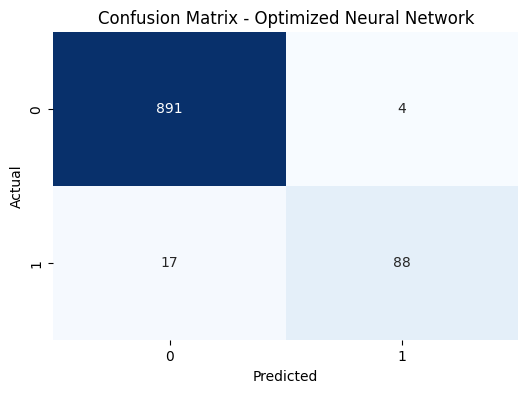

In [32]:
cm = confusion_matrix(y_test, y_pred_optimized)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Optimized Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Conclusion :**

The Optimized Neural Network model achieved the best performance in predicting loan approvals, with an accuracy of 98%, a precision of 0.96, and an F1 score of 0.89, slightly outperforming the Baseline Neural Network in terms of precision. While both models demonstrated high accuracy and similar F1 scores, the optimized model’s higher precision indicates better accuracy in predicting positive cases (approved loans) with fewer false positives. This optimized model is thus more suitable for reducing risk in loan approval decisions while maintaining high accuracy.

